In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/mnt/d/Backup/Documents/GitHub/spateo-release')
import spateo

/mnt/d/linux_tools/miniconda3/envs/stereotools/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/mnt/d/linux_tools/miniconda3/envs/stereotools/lib/python3.7/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [2]:
# readBGI by segmentated label
obj_cells = spateo.read_bgi(
    path = '/mnt/f/data/042.INTRONIC/00.data/Injury_15DPI_rep3_FP200000266TR_E3/Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.tsv.gz',
    binsize = 50, # will be ignored
    label_path = '/mnt/f/data/042.INTRONIC/00.data/Injury_15DPI_rep3_FP200000266TR_E3/Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.npy',
    slice = 'Injury_15DPI_rep3_FP200000266TR_E3',
    version = 'stereo_v1',
)
obj_cells

AnnData object with n_obs × n_vars = 9680 × 33159
    obs: 'label', 'area', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'centroid-0', 'centroid-1', 'contours', 'slice'
    obsm: 'spatial'
    layers: 'spliced'

In [3]:
obj_cells.obs["bigger"] = "Label A"
obj_cells.obs.loc[obj_cells.obs["area"]>800, "bigger"] = "Label B"

## space plot (based on sactters plot, matplotlib)

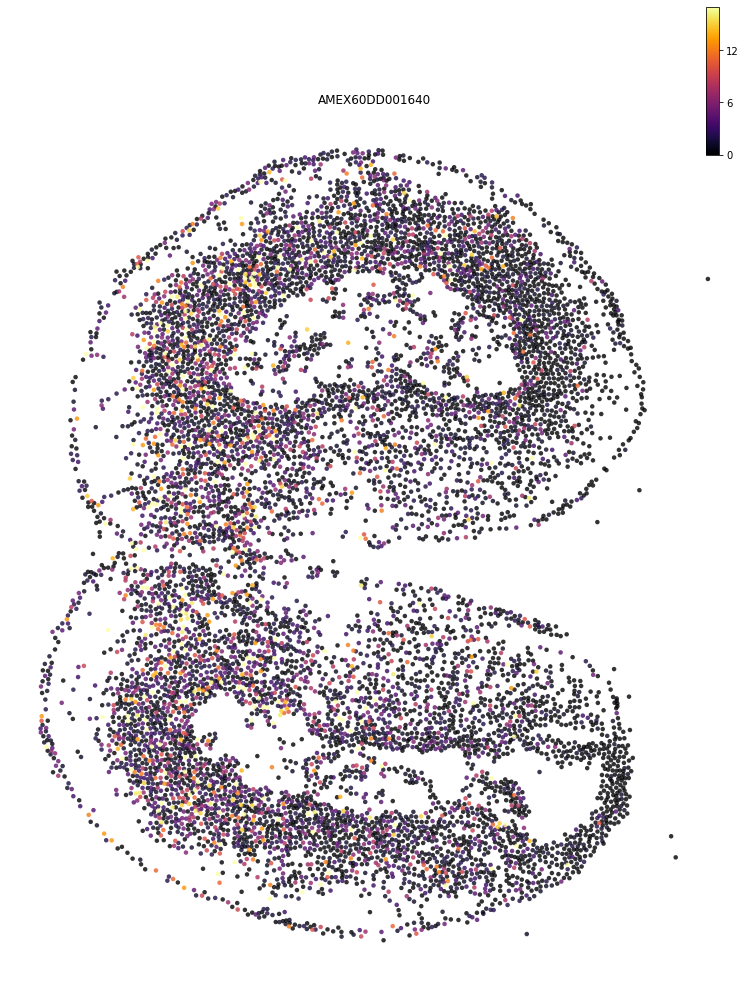

In [4]:
spateo.pl.space(obj_cells, genes=['AMEX60DD001640'],pointsize=0.5, figsize=(16,16)) # using basis `spatial`, but don't need `X_spatial`

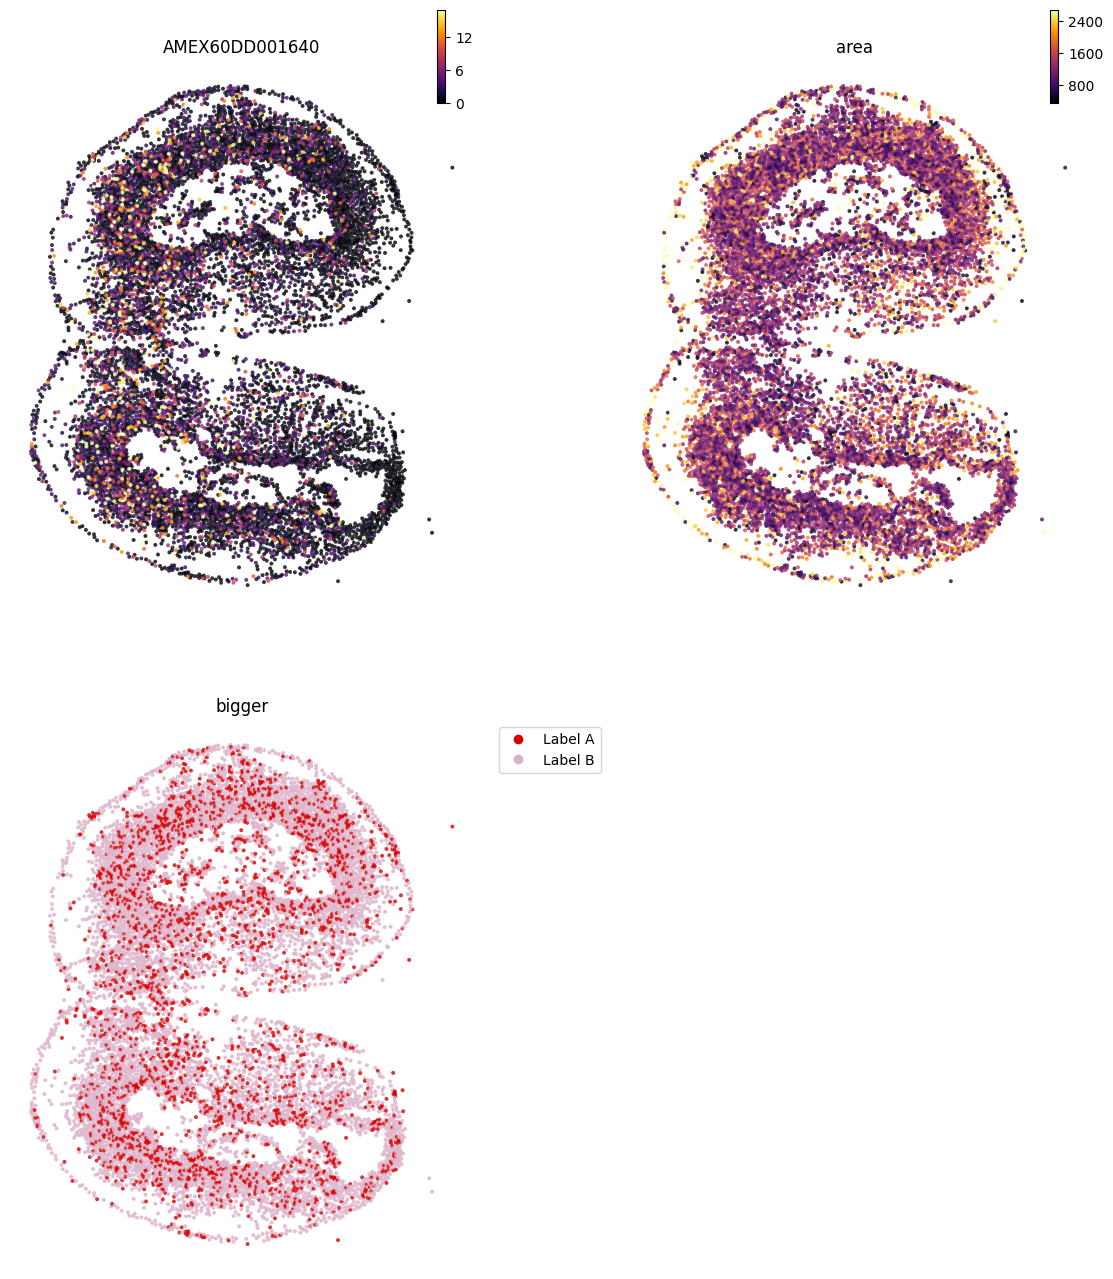

In [5]:
spateo.pl.space(obj_cells, genes=['AMEX60DD001640', 'area'], 
                color = ['bigger'],
                pointsize=0.2,
                ncols=2,
                show_legend="upper left",
                figsize=(8,8)
               )

## geoplot (based on geopandas and matplotlib)

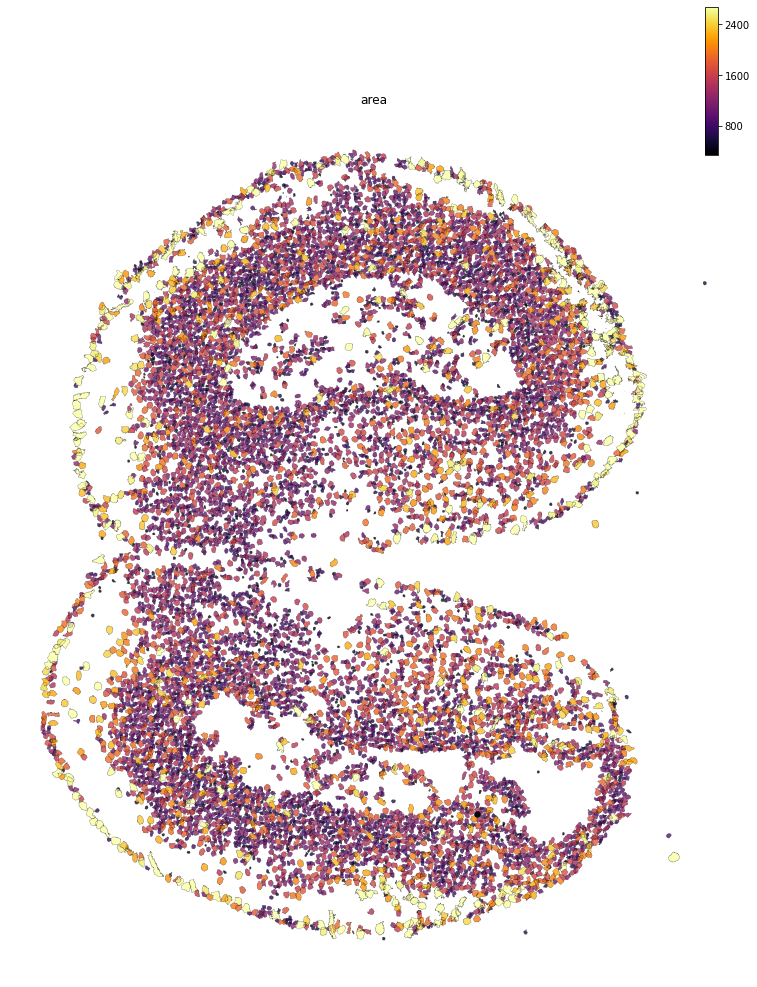

In [6]:
spateo.pl.geo(obj_cells, genes=['area'], figsize=(16,16))  # using geometry info

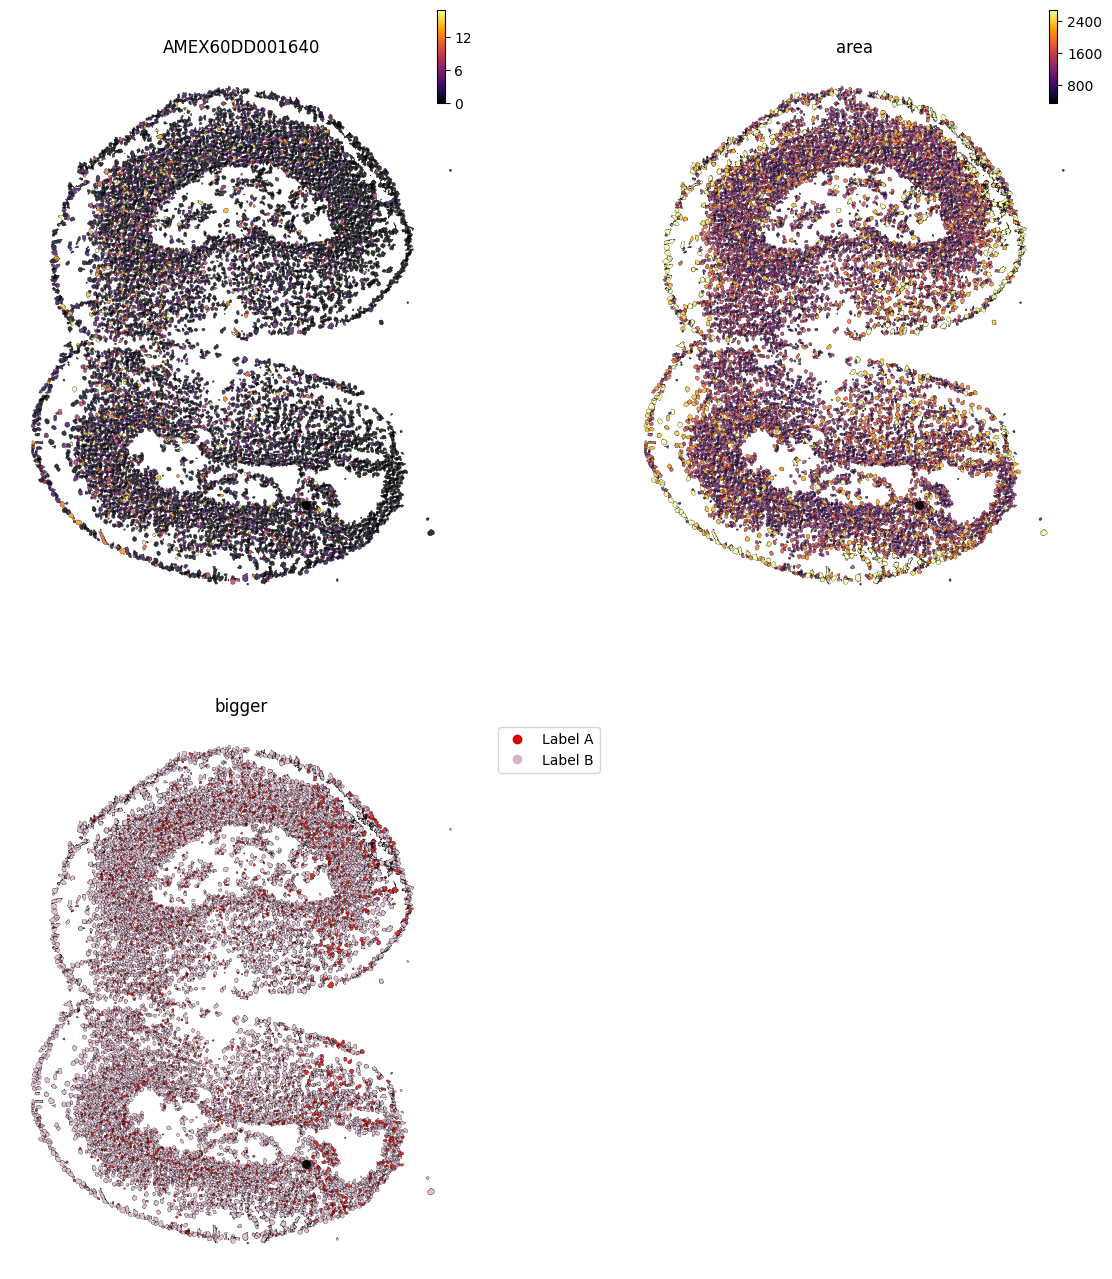

In [8]:
spateo.pl.geo(obj_cells, 
              genes=['AMEX60DD001640', 'area'], 
              color = ['bigger'],
              ncols=2,
              linewidth=0.2,
              linecolor="black",
              show_legend="upper left",
              figsize=(8,8)
             )

## Dimension Reduction

In [ ]:
# spateo.pl.pca(adata)  # using basis `pca`
# spateo.pl.umap(adata) # using basis `umap`
# spateo.pl.tsne(adata) # using basis `tsne`